In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
import numpy as np 

# df = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/BTC-AUD?period1=1410912000&period2=1674259200&interval=1d&events=history&includeAdjustedClose=true")
# df = df.dropna()

import pyodbc

server = 'AUCLD04018656'
database = 'team_five_aiml_group'

conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    f'SERVER={server};'
    f'DATABASE={database};'
    'Trusted_Connection=yes;'
)

cursor = conn.cursor()
cursor.execute('SELECT * FROM [team_five_aiml_group].[dbo].[BTC_AUD_20130101_20230127] A LEFT JOIN [team_five_aiml_group].[dbo].BTC_SUPP_DATA_20130101_20230127 B ON A.mkt_Date = B.supp_date')

rows = cursor.fetchall()

columns = [column[0] for column in cursor.description]

values = [list(row) for row in rows]

df = pd.DataFrame(values, columns=columns)
# df['mkt_Date'] = pd.to_datetime(df['mkt_Date'])
# # change the datetime64 values to object
df['mkt_Date'] = df['mkt_Date'].astype(str)
df['mkt_Date'] = df['mkt_Date'].str.replace(r'\s.*', '')

df['mkt_Date'] = df['mkt_Date'].astype(object)

df['supp_date'] = df['supp_date'].astype(str)
df['supp_date'] = df['supp_date'].str.replace(r'\s.*', '')

df['supp_date'] = df['supp_date'].astype(object)



conn.close()

<ipython-input-1-e4419e4e9558>:36: FutureWarning: The default value of regex will change from True to False in a future version.
  df['mkt_Date'] = df['mkt_Date'].str.replace(r'\s.*', '')
<ipython-input-1-e4419e4e9558>:41: FutureWarning: The default value of regex will change from True to False in a future version.
  df['supp_date'] = df['supp_date'].str.replace(r'\s.*', '')


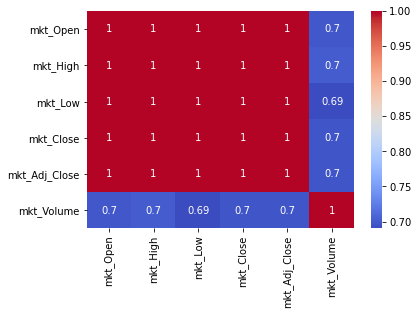

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Compute the pairwise correlation between all columns
correlation = df.corr()

# Plot the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [3]:
df.head()

,mkt_Date,mkt_Open,mkt_High,mkt_Low,mkt_Close,mkt_Adj_Close,mkt_Volume,supp_date,bitcoin_transaction,size_btc,...,bitcoin_transactionfees,bitcoin_median_transaction_fee,bitcoin_confirmationtime,transactionvalue_btc,mediantransactionvalue_btc,tweets_btc,google_trends_btc,activeaddresses_btc,top100cap_btc,fee_to_reward_btc
0,2014-09-17,513.122620,516.007935,504.935272,510.645386,510.645386,23511389,2014-09-17,80119,240563,...,0.0699,0.0456,7.742,2636,110.753,27946,7.619,170439,19.806,0.264
1,2014-09-18,510.116119,510.002228,459.924286,472.650330,472.650330,38400000,2014-09-18,77185,236621,...,0.0701,0.0439,8.045,3951,131.235,21135,7.619,171901,19.848,0.276
2,2014-09-19,472.275055,477.761017,428.161682,442.249359,442.249359,42477540,2014-09-19,69266,221271,...,0.0622,0.0406,8.421,4006,130.667,20775,9.675,150729,19.822,0.248
3,2014-09-20,442.111572,474.174957,436.745819,458.053101,458.053101,41294500,2014-09-20,63306,208320,...,0.0665,0.041,8.182,4860,94.343,17607,7.377,149520,19.925,0.233
4,2014-09-21,457.135651,461.998413,440.440247,446.308197,446.308197,29744964,2014-09-21,59636,217914,...,0.0628,0.0401,8.78,5157,80.706,17026,7.498,171703,19.952,0.228


<AxesSubplot:xlabel='mkt_Date'>

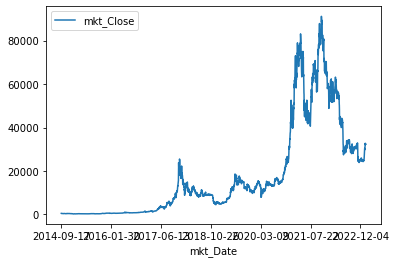

In [4]:
df.plot.line(x = "mkt_Date", y="mkt_Close", use_index=True)


In [5]:
# Ensure we know the actual closing price
data = df[["mkt_Close"]]
data = data.rename(columns = {'mkt_Close':'Actual_Close'})

# Setup our target.  This identifies if the price went up or down
data["Target"] = df.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["mkt_Close"]

In [6]:
data.head()

,Actual_Close,Target
0,510.645386,NaN
1,472.650330,0.0
2,442.249359,0.0
3,458.053101,1.0
4,446.308197,0.0


In [7]:
df_prev = df.copy()
df_prev = df_prev.shift(1)
df_prev.head()

,mkt_Date,mkt_Open,mkt_High,mkt_Low,mkt_Close,mkt_Adj_Close,mkt_Volume,supp_date,bitcoin_transaction,size_btc,...,bitcoin_transactionfees,bitcoin_median_transaction_fee,bitcoin_confirmationtime,transactionvalue_btc,mediantransactionvalue_btc,tweets_btc,google_trends_btc,activeaddresses_btc,top100cap_btc,fee_to_reward_btc
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-17,513.122620,516.007935,504.935272,510.645386,510.645386,23511389.0,2014-09-17,80119,240563,...,0.0699,0.0456,7.742,2636,110.753,27946,7.619,170439,19.806,0.264
2,2014-09-18,510.116119,510.002228,459.924286,472.650330,472.650330,38400000.0,2014-09-18,77185,236621,...,0.0701,0.0439,8.045,3951,131.235,21135,7.619,171901,19.848,0.276
3,2014-09-19,472.275055,477.761017,428.161682,442.249359,442.249359,42477540.0,2014-09-19,69266,221271,...,0.0622,0.0406,8.421,4006,130.667,20775,9.675,150729,19.822,0.248
4,2014-09-20,442.111572,474.174957,436.745819,458.053101,458.053101,41294500.0,2014-09-20,63306,208320,...,0.0665,0.041,8.182,4860,94.343,17607,7.377,149520,19.925,0.233


In [8]:
# Create our training data
predictors = [
    'mkt_Open',
    'mkt_High',
    'mkt_Low',
    'mkt_Close',
    'mkt_Adj_Close',
    'mkt_Volume',
    ]
data = data.join(df_prev[predictors]).iloc[1:]

In [9]:
data.head()

,Actual_Close,Target,mkt_Open,mkt_High,mkt_Low,mkt_Close,mkt_Adj_Close,mkt_Volume
1,472.650330,0.0,513.122620,516.007935,504.935272,510.645386,510.645386,23511389.0
2,442.249359,0.0,510.116119,510.002228,459.924286,472.650330,472.650330,38400000.0
3,458.053101,1.0,472.275055,477.761017,428.161682,442.249359,442.249359,42477540.0
4,446.308197,0.0,442.111572,474.174957,436.745819,458.053101,458.053101,41294500.0
5,453.077972,1.0,457.135651,461.998413,440.440247,446.308197,446.308197,29744964.0


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
data=data.dropna()
X = data[ [
    'mkt_Open',
    'mkt_High',
    'mkt_Low',
    'mkt_Volume'
  ]]
y = data['Actual_Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [11]:
print(mean_absolute_error(y_test, y_pred))

570.9182927138958


In [12]:
for i, j in zip(y_test,y_pred):
    print("Actual price {}".format(i)+"            "+"Predicted price {}".format(j))
    print("Delta: {}".format(abs(i-j)))
    print("\n----------------\n")

Actual price 60519.90234375            Predicted price 62849.19177224419
Delta: 2329.2894284941867

----------------

Actual price 864.2919311523438            Predicted price 853.1300401695726
Delta: 11.161890982771183

----------------

Actual price 4932.919921875            Predicted price 5105.459586923774
Delta: 172.5396650487737

----------------

Actual price 11843.8232421875            Predicted price 11724.87571467002
Delta: 118.9475275174791

----------------

Actual price 8802.7958984375            Predicted price 8752.413897486502
Delta: 50.38200095099819

----------------

Actual price 12679.0087890625            Predicted price 14505.993040273923
Delta: 1826.9842512114228

----------------

Actual price 443.2430419921875            Predicted price 461.3379393655235
Delta: 18.094897373335982

----------------

Actual price 11361.2958984375            Predicted price 10429.037553149072
Delta: 932.2583452884282

----------------

Actual price 5583.970703125            Predic